# FMCA interface

### first import modules

In [167]:
# import seems necessary to not crash matplotlib
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as la
import time
import FMCA

### generate data points and samplet tree
(We force NumPy to use column major arrays for performance reasons)

In [171]:
dim = 2
N = 42000
dtilde = 3
pts = np.array(np.random.randn(dim, N), order='F')
start = time.time()
ST = FMCA.SampletTree(pts, dtilde)
stop = time.time()
print('elapsed time samplet tree construction: ', stop - start, 'sec.')
FMCA.sampletTreeStatistics(ST, pts)
# reorder points according to samplet tree order
pts = pts[:, ST.indices()]

elapsed time samplet tree construction:  0.09526371955871582 sec.
------------------- Cluster tree metrics -------------------
dimension:                2
number of points:         42000
cluster splitting method: CardinalityBisection
bounding box diameter:    1.18e+01
number of clusters:       4095
fill distance:            8.38e-01
separation radius:        2.86e-05
min cluster discrepancy:  2.45e-06
max cluster discrepancy:  1.01e-01
mean cluster discrepancy: 2.16e-03
pt. mindist distribution: 
 1.59e-06|****************************************
 4.78e-06|*
 7.97e-06|*
 1.12e-05|*
 1.43e-05|*
 1.75e-05|*
 2.07e-05|*
 2.39e-05|*
 2.71e-05|*
 3.03e-05|*
 3.35e-05|
 3.67e-05|
 3.99e-05|*
 4.30e-05|
 4.62e-05|
discrepancy distribution: 
 3.50e-06|*
 7.10e-06|*
 1.44e-05|*
 2.93e-05|*
 5.95e-05|*
 1.21e-04|***
 2.46e-04|**********
 4.99e-04|****************************************
 1.01e-03|********************
 2.06e-03|**********
 4.18e-03|******
 8.49e-03|****
 1.72e-02|**
 3.50e-02|*
 

### transform a given set of data vectors into samplet basis and back
(We force NumPy to use column major arrays for performance reasons)

In [172]:
start = time.time()
data = 2 * np.array(np.random.rand(N,1000), order='F') - 1
Tdata = FMCA.sampletTransform(ST, data)
data2 = FMCA.inverseSampletTransform(ST, Tdata)
stop = time.time()
print('elapsed time forward and backward transform: ', stop - start, 'sec.')
print('relative error: ', la.norm(data - data2) / la.norm(data))

elapsed time forward and backward transform:  0.842318058013916 sec.
relative error:  5.1704243849930175e-16


### plot a samplet
(Basis elements can be retrieved by inverse transforming unit vectors)

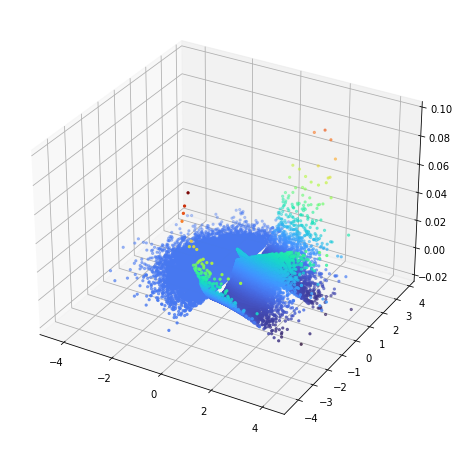

In [173]:
unit = np.array(np.zeros(N), order='F');
unit[22] = 1
Tunit = FMCA.inverseSampletTransform(ST, unit)
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(pts[0,:], pts[1,:], Tunit[:,0], c=Tunit[:,0], marker='.', cmap='turbo')
plt.show()